In [35]:
# Aug 22 2021
# Parsing previous microscope tests
# Written by Svena Yu

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
names = ['Item', 'Source', 'Radius', 'Diameter', 'NDT', 'NDZ', 'NDM', 'Comment', 'Unnamed']

## Composition Test

In [45]:
LS406025_film = '406025LS_Film_9Aug2021_50x_measuringdata.txt'
LS406025 = 'TBD'
AL406025 = '406025AL_Diluted_Aug232021_usedforUVtestbyayako_50x_data.txt'
LS307025 = '307025LC_diluted_50x_10Aug_data.txt'
LS406025_29July = '40_60F_25_S_50x_diluted_290721_measuring_data.txt'
ls406025_film_df = pd.read_csv(LS406025_film, encoding="utf16", delimiter='\t', names=names, skiprows=2)
al406025_df = pd.read_csv(AL406025, encoding='utf16', delimiter='\t', names=names, skiprows=2)
ls307025_df = pd.read_csv(LS307025, encoding='utf16', delimiter='\t', names=names, skiprows=2)
ls406025_df = pd.read_csv(LS406025_29July, encoding='utf16', delimiter='\t', names=names, skiprows=1)

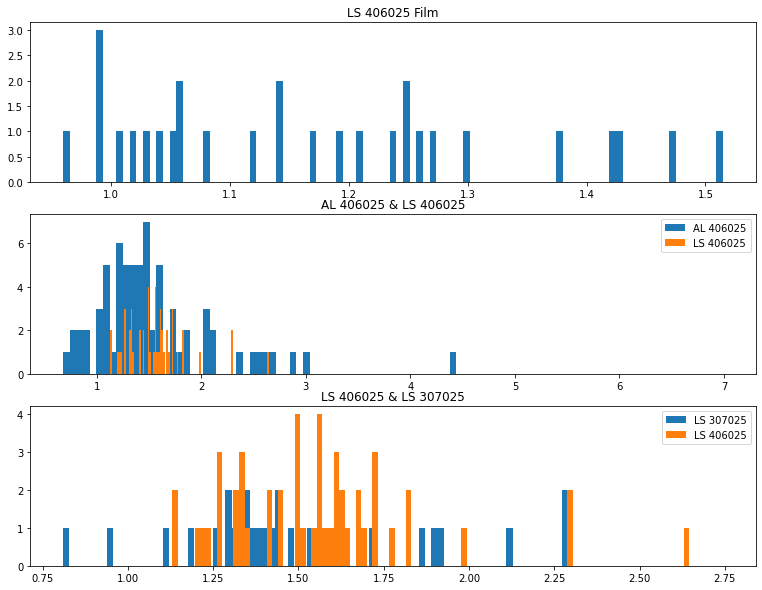

In [49]:
def series_to_float(series):
    return [ float(i) for i in series.values.tolist() ]

def binfunc(data):
    return np.arange(data.min(), data.max(), (data.max()-data.min())/100)

fig1= plt.figure(figsize=(13,10))

ax1 = plt.subplot(311)
ls406025_film_df['Diameter'] = series_to_float(ls406025_film_df['Diameter'])
ax1.hist(ls406025_film_df['Diameter'],bins=binfunc(ls406025_film_df['Diameter']))
ax1.set_title('LS 406025 Film')

ax2 = plt.subplot(312)
al406025_df['Diameter'] = series_to_float(al406025_df['Diameter'])
ax2.hist(al406025_df['Diameter'],bins=binfunc(al406025_df['Diameter']), label='AL 406025')
ax2.hist(ls406025_df['Diameter'],bins=binfunc(ls406025_df['Diameter']), label='LS 406025')
# ax2.hist(ls307025_df['Diameter'],bins=binfunc(ls307025_df['Diameter']))
ax2.set_title('AL 406025 & LS 406025')
plt.legend()

ax3 = plt.subplot(313)
ls307025_df['Diameter'] = series_to_float(ls307025_df['Diameter'])
ax3.hist(ls307025_df['Diameter'],bins=binfunc(ls307025_df['Diameter']), label='LS 307025')
ax3.hist(ls406025_df['Diameter'],bins=binfunc(ls406025_df['Diameter']), label='LS 406025')
ax3.set_title('LS 406025 & LS 307025')
plt.legend()

In [39]:
df_40 = pd.read_csv('40_63x-3_dropletsize.csv', skiprows=2)
scaling_40 = 348/38 #pixels/micrometer
df_40['Area'] = np.sqrt(df_40['Area']*4/np.pi)/scaling_40 #in micrometers
df_40.head()

,,Area,Mean,Min,Max
0,1,1.587499,28.235,13,50
1,2,1.256539,30.635,17,57
2,3,1.321321,31.983,16,60
3,4,1.900850,27.887,9,52
4,5,1.436908,31.757,15,52


(array([1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 1., 0., 0., 0., 1., 0., 2., 1., 2., 2., 1., 1., 1., 1.,
        2., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 2., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0.81  , 0.8283, 0.8466, 0.8649, 0.8832, 0.9015, 0.9198, 0.9381,
        0.9564, 0.9747, 0.993 , 1.0113, 1.0296, 1.0479, 1.0662, 1.0845,
        1.1028, 1.1211, 1.1394, 1.1577, 1.176 , 1.1943, 1.2126, 1.2309,
        1.2492, 1.2675, 1.2858, 1.3041, 1.3224, 1.3407, 1.359 , 1.3773,
        1.3956, 1.4139, 1.4322, 1.4505, 1.4688, 1.4871, 1.5054, 1.5237,
        1.542 , 1.5603, 1.5786, 1.5969, 1.6152, 1.6335, 1.6518, 1.6701,
        1.6884, 1.7067, 1.725 , 1.7433, 1.7616, 1.7799, 1.7982, 1.8165,
        1.8348, 1.8531, 1.8714, 1.8897, 1.908 , 1.

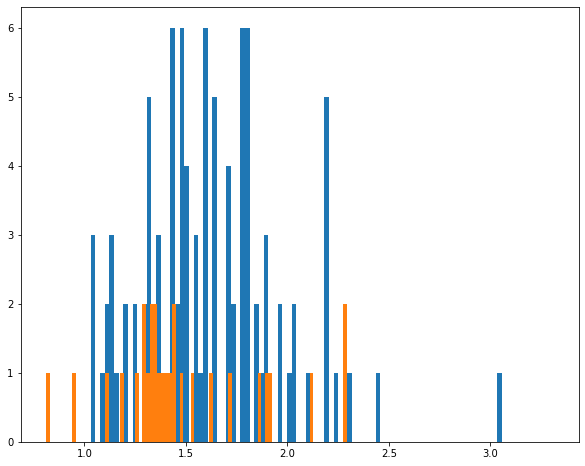

In [41]:
fig2 = plt.figure(figsize=(10,8))
plt.hist(df_40['Area'],bins=binfunc(df_40['Area']))
plt.hist(ls307025_df['Diameter'],bins=binfunc(ls307025_df['Diameter']))

## Ultrasonics Test

In [ ]:
tenpc = '505025LCLS_10%S_Aug192021_20x_data.txt'
sixtypc = '505025LCLS_60%S_Aug192021_50x_data.txt'
ten_df = pd.read_csv(tenpc, encoding="utf16", delimiter='\t', names=names, skiprows=2)
sixty_df = pd.read_csv(sixtypc, encoding='utf16', delimiter='\t', names=names, skiprows=1)
dil_df = pd.read_csv('307025LC_diluted_50x_10Aug_data.txt', encoding='utf16', delimiter='\t', names=names, skiprows=1)
ten_df.head()
sixty_df.head()
dil_df.head()

In [ ]:
np.arange(0,10,1)

In [ ]:
ten_df_bins = np.arange(ten_df['Radius'].min(), ten_df['Radius'].max(), 0.2)
sixty_df_bins = np.arange(sixty_df['Radius'].min(), sixty_df['Radius'].max(), 0.1)
dil_df_bins = np.arange(dil_df['Radius'].min(), dil_df['Radius'].max(), 0.1)
fig = plt.figure(figsize=(12,8))
ax1 = plt.subplot(111)
ax1.hist(ten_df['Diameter'], bins=ten_df_bins, label='After 10% Ultrasonication', alpha=0.8)
ax1.hist(ten_df['Diameter'], bins=sixty_df_bins, label='After 60% Ultrasonication', alpha=0.9)
ax1.hist(dil_df['Diameter'], bins=dil_df_bins, label='2min Ultrasonication', color='maroon')
plt.title('Distribution of Droplet Size after Ultrasonication', fontsize=16)
plt.legend(fontsize=13)
plt.xlabel('Diameter (um)', fontsize=13)
plt.ylabel('# Occurrences', fontsize=13)
plt.savefig('dropletsize_distribution.png')